# LangGraph 기반의 챗봇 구축

### 필요 라이브러리 설치

In [1]:
!pip install langgraph langchain_openai langchain-core langchain-upstage langchain_teddynote

  Using cached langgraph-1.0.6-py3-none-any.whl.metadata (7.4 kB)
  Using cached langchain_teddynote-0.5.4-py3-none-any.whl.metadata (20 kB)
  Using cached langgraph_checkpoint-4.0.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached langgraph_prebuilt-1.0.6-py3-none-any.whl.metadata (5.2 kB)
  Using cached langgraph_sdk-0.3.3-py3-none-any.whl.metadata (1.6 kB)
  Using cached anthropic-0.76.0-py3-none-any.whl.metadata (28 kB)
  Using cached deepl-1.27.0-py3-none-any.whl.metadata (37 kB)
  Using cached feedparser-6.0.12-py3-none-any.whl.metadata (2.7 kB)
  Using cached kiwipiepy-0.22.2-cp39-abi3-win_amd64.whl.metadata (1.3 kB)
  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
INFO: pip is looking at multiple versions of langchain-teddynote to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-teddynote to determine which version is compatible with other requirements. This co

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-text-splitters 0.3.8 requires langchain-core<1.0.0,>=0.3.51, but you have langchain-core 1.2.7 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### STEP 1. 상태(State) 정의

In [10]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages
from langchain_teddynote.graphs import visualize_graph


class State(TypedDict):
    # 메시지 정의(list type 이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]

### STEP 2. 노드(Node) 정의

In [11]:
from langchain_upstage import ChatUpstage

# LLM 정의
llm = ChatUpstage(api_key="up_HIH5w7MHZN1dRIsK7A2GraLbJTG5d", model="solar-pro2")


# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm.invoke(state["messages"])]}

### STEP 3. 그래프(Graph) 정의, 노드 추가

In [12]:
from langgraph.graph import StateGraph, START, END

# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)

### STEP 4. 그래프 엣지(Edge) 추가

다음으로, `START` 지점을 추가하세요. `START`는 그래프가 실행될 때마다 **작업을 시작할 위치** 입니다.

In [13]:
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")


마찬가지로, `END` 지점을 설정하십시오. 이는 그래프 흐름의 종료(끝지점) 를 나타냅니다.

In [14]:
# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)

### STEP 5. 그래프 컴파일(compile)

마지막으로, 그래프를 실행할 수 있어야 합니다. 이를 위해 그래프 빌더에서 "`compile()`"을 호출합니다. 이렇게 하면 상태에서 호출할 수 있는 "`CompiledGraph`"가 생성됩니다.

In [15]:
# 그래프 컴파일
graph = graph_builder.compile()

### STEP 6. 그래프 시각화

이제 그래프를 시각화해봅시다.

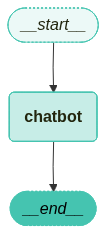

In [16]:

# 그래프 시각화
visualize_graph(graph)

### STEP 7. 그래프 실행

이제 챗봇을 실행해봅시다!

In [17]:
question = "호주 시드니 7박 8일 여행 일정을 세워줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: 호주 시드니는 자연경관과 도시 생활이 조화를 이루는 매력적인 도시입니다. 7박 8일 동안 주요 명소와 활동을 골고루 체험할 수 있는 **추천 일정**을 구성해 드리겠습니다. 취향에 따라 조정하셔도 좋습니다.

---

### **📅 시드니 7박 8일 여행 일정 (예시)**
**테마:** 시티 탐방 + 근교 자연경관 + 휴식

---

#### **📅 1일차: 시드니 도착 & 도심 탐방**
- **오후**  
  - 시드니 공항(Kingsford Smith) 도착 후 시내 이동 (공항 셔틀/기차 이용).  
  - 호텔 체크인 후 **더 록스(The Rocks)** 산책: 역사적 건축물, 워터프론트 카페.  
  - **밀러스 포인트(Milers Point)**에서 시드니 하버 브리지 배경 사진 촬영.  
- **저녁**  
  - **와틀 스트리트(Woolloomooloo Wharf)**에서 신선한 해산물 디너.

---

#### **📅 2일차: 시드니 명소 집중 탐방**
- **아침**  
  - **시드니 오페라 하우스** 외부 관람 (내부 투어는 예약 필수).  
  - **왕실식물원(Royal Botanic Gardens)**에서 아침 산책.  
- **오전~오후**  
  - **시드니 타워 아이(Sydney Tower Eye)** 전망대 방문.  
  - **다윈 워크(Darling Harbour)**에서 점심 + **SEA LIFE 시드니 아쿠아리움** 관람.  
- **저녁**  
  - **서큘러 키(Circular Quay)** 근처 레스토랑에서 디너 + 야경 감상.

---

#### **📅 3일차: 본다이 비치 + 동쪽 해안 드라이브**
- **종일**  
  - **본다이 비치(Bondi Beach)**에서 수영 또는 서핑 체험.  
  - **본다이 투 코지(Bondi to Coogee Walk)**: 절경을 따라 3시간 트레킹.  
  - **와이머럴(Waverley) 카페**에서 브런치.  
  - **더블 베

## 전체 코드

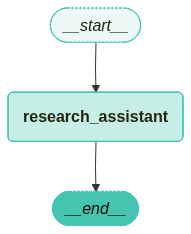

=== 연구원 AI 응답 ===
최근 제조업에서 AI Agent는 **설계 최적화**, **공정 자동화**, **품질 예측** 분야에서 혁신을 주도하고 있습니다. 각 분야별 주요 연구 사례와 적용 기술을 정리하면 다음과 같습니다.

---

### 1. **설계 최적화 (Design Optimization)**
AI Agent는 복잡한 설계 문제를 해결하기 위해 **생성형 AI**와 **강화 학습(RL)**을 활용해 최적 형상을 탐색합니다.  
- **사례 1: Generative Design (오토데스크)**  
  - AI가 공학적 제약 조건(무게, 강도, 재료)을 입력받아 최적의 3D 구조를 생성.  
  - 예: BMW는 AI로 경량화된 자동차 부품 설계하여 40% 이상 무게 감소.  
- **사례 2: 강화 학습 기반 로봇 그리퍼 설계**  
  - OpenAI의 **Dactyl** 프로젝트는 RL을 이용해 다양한 물체를 잡을 수 있는 로봇 손 설계 최적화.  
- **기술**:  
  - **GAN(Generative Adversarial Network)**: 설계 후보 생성 및 평가.  
  - **다목적 최적화 알고리즘**: Pareto 최적해 탐색.

---

### 2. **공정 자동화 (Process Automation)**
AI Agent는 실시간 데이터 분석을 통해 생산 라인을 자동화하고 **예기치 않은 변수**에 적응합니다.  
- **사례 1: 반도체 공정 최적화 (ASML)**  
  - AI가 웨이퍼 에칭 공정의 파라미터(압력, 온도)를 실시간 조정해 수율 15% 향상.  
- **사례 2: 협동 로봇(Cobot) 작업 계획**  
  - Siemens는 AI Agent가 **디지털 트윈**과 연동해 조립 라인에서 로봇의 이동 경로를 동적으로 최적화.  
- **사례 3: 예측적 유지보수 (Predictive Maintenance)**  
  - GE의 **Predix 플랫폼**: 센서 데이터 분석으로 장비 고장 72시간 전 예측

In [ ]:
"""
[연구원용 LangGraph 기본 예제]

이 코드는 LangGraph를 활용해
- 연구원이 질문을 던지면
- LLM이 연구 보조 답변을 생성하는
가장 단순한 단일 노드(StateGraph) 구조의 챗봇입니다.

✔ 활용 시나리오
- 기술 트렌드 요약
- 논문 조사 보조
- 사내 기술 보고서 초안 생성
"""

from typing import Annotated, TypedDict

# LangGraph 핵심 구성요소
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# 그래프 시각화 유틸 (교육용)
from langchain_teddynote.graphs import visualize_graph


############################
###### STEP 1. 상태(State) 정의 ######
############################
class State(TypedDict):
    """
    State는 LangGraph 전체에서 공유되는 '상태 컨테이너'입니다.

    여기서는:
    - messages: 사용자 ↔ LLM 간의 모든 대화를 누적 저장

    Annotated[list, add_messages] 의미:
    - list 형태의 메시지를 유지하면서
    - 노드 실행 결과 메시지를 자동으로 누적(add)해줌
    """
    messages: Annotated[list, add_messages]


############################
###### STEP 2. 노드(Node) 정의 ######
############################

# 연구원용 LLM 설정
from langchain_upstage import ChatUpstage
llm = ChatUpstage(api_key="up_HIH5w7MHZN1dRIsK7A2GraLbJTG5d", model="solar-pro2")


def research_assistant(state: State):
    """
    연구원 AI 어시스턴트 노드

    역할:
    - 현재까지 누적된 messages(state["messages"])를 입력으로 받고
    - LLM에게 전달하여
    - 새로 생성된 AI 응답 메시지를 반환

    반환 형식은 반드시:
    {
        "messages": [새로운 메시지]
    }
    형태여야 LangGraph가 상태를 갱신할 수 있음
    """

    # LLM 호출 (이전 대화 컨텍스트 전체 전달)
    response = llm.invoke(state["messages"])

    # 새로운 메시지를 messages에 추가
    return {
        "messages": [response]
    }


############################
###### STEP 3. 그래프(Graph) 생성 및 노드 추가 ######
############################

# StateGraph 생성 (State 타입을 기반으로 상태 흐름 관리)
graph_builder = StateGraph(State)

# "research_assistant"라는 이름으로 노드 등록
graph_builder.add_node(
    "research_assistant",
    research_assistant
)


############################
###### STEP 4. 그래프 엣지(Edge) 정의 ######
############################

# START → research_assistant
# 사용자의 질문이 들어오면 가장 먼저 이 노드 실행
graph_builder.add_edge(START, "research_assistant")

# research_assistant → END
# 단일 응답 후 그래프 종료
graph_builder.add_edge("research_assistant", END)


############################
###### STEP 5. 그래프 컴파일 ######
############################

# 정의된 노드와 엣지를 실제 실행 가능한 그래프로 변환
graph = graph_builder.compile()


############################
###### STEP 6. 그래프 시각화 ######
############################

# 연구원 교육/설명용 그래프 구조 시각화
visualize_graph(graph)


############################
###### STEP 7. 그래프 실행 ######
############################

# 연구원이 던지는 질문 예시
question = """
너는 호주 여행 전문 여행 플래너다.
아래 조건을 모두 반영하여 호주 시드니 7박 8일 여행 일정을 상세하게 구성해줘.

[여행 기본 정보]
- 여행지: 호주 시드니
- 여행 기간: 7박 8일
- 여행자 구성: [예: 성인 2명 / 가족 / 친구 / 혼자]
- 여행 스타일: [예: 관광 위주 / 휴양 위주 / 자연+도시 / 미식 중심 / 여유로운 일정]
- 예산 수준: [예: 중간 / 가성비 / 럭셔리]
- 여행 시기: [예: 5월 / 여름 / 겨울 등]

[일정 구성 조건]
- 날짜별(1일차~8일차)로 구분하여 작성
- 각 날짜마다:
  - 오전 / 오후 / 저녁 일정
  - 주요 관광지 및 활동 설명
  - 이동 방법(도보, 대중교통, 페리 등)
- 시드니 시내 명소(오페라 하우스, 하버 브리지, 본다이 비치 등) 포함
- 근교 당일치기 여행 1~2회 포함 가능(예: 블루마운틴)
- 일정이 과도하게 빡빡하지 않도록 구성

[추가 요청]
- 추천 맛집 또는 음식 종류 간단히 포함
- 여행 팁(교통카드, 주의사항, 복장 등) 마지막에 정리
- 처음 시드니를 방문하는 여행자 기준으로 설명

한국어로 작성해줘.
"""

# graph.stream():
# - LangGraph의 실행 과정을 이벤트 단위로 스트리밍
# - 멀티 노드, 반복 구조에서 특히 유용
for event in graph.stream(
    {
        "messages": [
            ("user", question)
        ]
    }
):
    # 각 이벤트에서 생성된 메시지 출력
    for value in event.values():
        print("=== 연구원 AI 응답 ===")
        print(value["messages"][-1].content)


## 멀티노드 예시

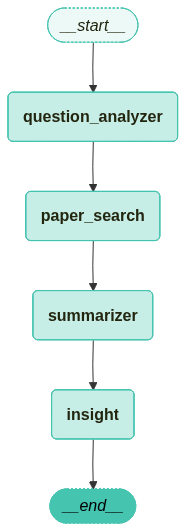

### 1. **연구 목적**  
- 제조업 분야에서 **AI Agent**의 적용 사례를 분석하여, **설계 최적화** 및 **공정 자동화**에 기여하는 방식을 규명  
- AI 기반 의사결정 시스템이 생산성, 품질, 비용 절감 등에 미치는 영향 평가  
- 실제 산업 적용 사례 및 기술적 한계를 포함한 종합적 이해 도모  

### 2. **핵심 기술 키워드**  
- **AI Agent**: 자율 의사결정, 강화학습(RL), 멀티에이전트 시스템  
- **설계 최적화**: 생성형 설계(Generative Design), 디지털 트윈, 시뮬레이션 최적화  
- **공정 자동화**: 컴퓨터 비전(CV), 로봇 프로세스 자동화(RPA), 예측 유지보수(Predictive Maintenance)  
- **관련 기술**: 딥러닝(DNN/CNN), GAN(생성적 적대 신경망), IoT-융합 시스템  

### 3. **조사 범위**  
- **연구 대상**:  
  - 자동차, 반도체, 중공업, 소비자 제품 등 **제조업 하위 분야**  
  - AI 에이전트를 활용한 설계/공정 관리 플랫폼 (예: Siemens NX, Autodesk Generative Design)  
- **산업 적용 사례**:  
  - 글로벌 기업(보쉬, 지멘스) 및 스타트업의 AI 도입 사례  
  - 스마트 팩토리 및 Industry 4.0 연계 프로젝트  
- **기술 레벨**:  
  - **기초**: AI 모델의 설계/공정 데이터 학습 및 실시간 분석  
  - **고도화**: 멀티에이전트 협업을 통한 공정 최적화  
  - **통합**: AI-물리 시스템(HW/SW) 연동 및 에지 컴퓨팅 적용  

### 추가 고려 사항  
- **데이터 소스**: 제조 실행 시스템(MES) 데이터, 센서 네트워크, CAD/CAE 소프트웨어 로그  
- **한계점**: 소규모 기업의 기술 도입 장벽, AI 모델의 설명 가능성(XAI) 필요성
### 제조업에서 AI Agent의 설계 최적화 및 

In [19]:
"""
[LangGraph 기반 연구원 AI 파이프라인]

START
  ↓
[Research Question Analyzer]
  ↓
[Paper Search Agent]
  ↓
[Summarization Agent]
  ↓
[Insight / Limitation Agent]
  ↓
END

✔ 연구 질문을 구조화하고
✔ 조사해야 할 연구 방향을 정리하며
✔ 연구 동향 요약 + 시사점까지 도출하는
✔ '연구 사고 프로세스 고정용' AI Agent 구조
"""

from typing import Annotated, TypedDict

# LangGraph core
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# LLM
from langchain_openai import ChatOpenAI

# (선택) 그래프 시각화
from langchain_teddynote.graphs import visualize_graph


################################
###### STEP 1. State 정의 ######
################################
class State(TypedDict):
    """
    LangGraph 전체 파이프라인에서 공유되는 상태(State)

    messages:
    - 각 Agent(Node)가 생성한 메시지를 누적 저장
    - 다음 Agent는 이전 결과를 모두 컨텍스트로 사용
    """
    messages: Annotated[list, add_messages]


################################
###### STEP 2. LLM 정의 ######
################################
from langchain_upstage import ChatUpstage
llm = ChatUpstage(api_key="up_HIH5w7MHZN1dRIsK7A2GraLbJTG5d", model="solar-pro2")

############################################
###### STEP 3. Node 1: Research Question Analyzer ######
############################################
def research_question_analyzer(state: State):
    """
    연구 질문을 구조적으로 분석하는 Agent

    출력:
    - 연구 목적
    - 핵심 기술 키워드
    - 조사 범위
    """
    system_prompt = """
    당신은 R&D 연구 질문 분석 전문가입니다.

    사용자의 질문을 아래 형식으로 정리하세요.

    1. 연구 목적
    2. 핵심 기술 키워드
    3. 조사 범위 (연구 대상, 산업, 기술 레벨)
    """

    response = llm.invoke(
        state["messages"] + [("system", system_prompt)]
    )

    return {"messages": [response]}


############################################
###### STEP 4. Node 2: Paper Search Agent ######
############################################
def paper_search_agent(state: State):
    """
    실제 논문 검색 대신,
    '조사해야 할 연구 방향'을 정의하는 Agent

    (추후 arXiv / Semantic Scholar API 연결 지점)
    """
    system_prompt = """
    위에서 구조화된 연구 질문을 바탕으로,
    조사해야 할 논문/연구 방향을 정리하세요.

    아래 항목을 포함하세요.
    - 주요 연구 주제
    - 대표적인 연구 방법론
    - 최근 3~5년 연구 트렌드
    """

    response = llm.invoke(
        state["messages"] + [("system", system_prompt)]
    )

    return {"messages": [response]}


############################################
###### STEP 5. Node 3: Summarization Agent ######
############################################
def summarization_agent(state: State):
    """
    연구 동향 요약 Agent

    출력:
    - 기술적 접근 방식
    - 공통적인 연구 성과
    - 산업 적용 사례
    """
    system_prompt = """
    지금까지의 내용을 기반으로,
    연구 동향을 '연구 보고서 스타일'로 요약하세요.

    반드시 포함할 항목:
    - 기술적 접근 방식
    - 주요 성과
    - 적용 가능한 산업 영역
    """

    response = llm.invoke(
        state["messages"] + [("system", system_prompt)]
    )

    return {"messages": [response]}


############################################
###### STEP 6. Node 4: Insight / Limitation Agent ######
############################################
def insight_limitation_agent(state: State):
    """
    연구 책임자 관점에서
    시사점과 한계를 도출하는 Agent
    """
    system_prompt = """
    당신은 연구 책임자입니다.

    아래 항목을 중심으로 정리하세요.
    1. 핵심 시사점 (Insight)
    2. 현재 연구의 기술적 한계
    3. 향후 연구 및 개발 과제
    """

    response = llm.invoke(
        state["messages"] + [("system", system_prompt)]
    )

    return {"messages": [response]}


############################################
###### STEP 7. Graph 구성 ######
############################################
graph_builder = StateGraph(State)

# 노드 등록
graph_builder.add_node("question_analyzer", research_question_analyzer)
graph_builder.add_node("paper_search", paper_search_agent)
graph_builder.add_node("summarizer", summarization_agent)
graph_builder.add_node("insight", insight_limitation_agent)

# 엣지 연결
graph_builder.add_edge(START, "question_analyzer")
graph_builder.add_edge("question_analyzer", "paper_search")
graph_builder.add_edge("paper_search", "summarizer")
graph_builder.add_edge("summarizer", "insight")
graph_builder.add_edge("insight", END)

# 그래프 컴파일
graph = graph_builder.compile()


############################################
###### STEP 8. (선택) 그래프 시각화 ######
############################################
visualize_graph(graph)


############################################
###### STEP 9. 실행 ######
############################################
question = """
제조업에서 AI Agent가
설계 최적화와 공정 자동화에
어떻게 활용되고 있는지 알고 싶다.
"""

for event in graph.stream(
    {"messages": [("user", question)]}
):
    for value in event.values():
        print("====================================")
        print(value["messages"][-1].content)
